# Multivariate Statistical Tests

### Multivariate Analysis of Variance (MANOVA)

In [1]:
!pip install -q -U watermark

In [2]:
%reload_ext watermark
%watermark -a "Zelly Irigon"

Author: Zelly Irigon



In [3]:
#Imports
import scipy
import statsmodels
import numpy as np
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import f
from numpy.linalg import inv, det

### Multivariate Analysis of Variance (MANOVA)
Multivariate Analysis of Variance (MANOVA) is a statistical technique used to analyse the differences between groups on multiple dependent variables simultaneously. It is an extension of Analysis of Variance (ANOVA), which is used for a single dependent variable. MANOVA is particularly useful when the dependent variables are correlated, and you want to understand how different independent variables (or groups) affect these dependent variables together.

**Hypotheses**

* Null Hypothesis (H0): The means of all dependent variables are equal across groups.
* Alternative Hypothesis (H1): At least one mean of a dependent variable differs across groups.

**Dependent and Independent Variables**

* MANOVA deals with two or more dependent variables.
* It can have one or more independent variables (factors), which are categorical.

**Correlation Between Dependent Variables**

One of the main reasons to use MANOVA is that it considers the correlation between the dependent variables, which can provide a more accurate understanding of the effect of the independent variables.

**Test Statistics**

MANOVA uses various test statistics such as Wilks' Lambda, Pillai's Trace, Hotelling-Lawley Trace, and Roy's Largest Root, each with its own characteristics and conditions of applicability.

**Assumptions of the Test**
> Short information about parametric tests and assumptions: Parametric tests in multivariate analysis are statistical procedures that assume the data follows specific distributions and satisfies certain conditions:
**Multivariate Normality:** The data across all dependent variables follows a multivariate normal distribution within each group or sample.
**Homogeneity of Covariance Matrices:** The variance and covariance (relationships between variables) matrices are similar across groups or samples.
**Independence:** Observations or samples are independent of each other.

* Multivariate normality of the data.
* Homogeneity of covariance matrices (variances are equal across groups).
* Independent samples.
 
**Interpretation**

A significant result indicates that there is a difference in the sets of means of the dependent variables across groups. However, additional analyses, such as post-hoc tests, may be necessary to identify exactly where these differences lie. We will see this shortly in Python.

**Applications of MANOVA**

* Social Sciences and Psychology Research: For example, comparing the effects of different therapeutic interventions on various aspects of psychological well-being.
* Biology and Medicine Research: Such as evaluating the effect of a treatment on multiple health indicators.
* Market Research: Assessing consumer reactions to different product features.

  
MANOVA is a powerful tool for multivariate analysis and is especially useful when the dependent variables are related to each other, allowing for a more comprehensive understanding of the effects of the independent variables.

### Multivariate Analysis of Variance (MANOVA) in Practice with Python
Let's assess if there are significant differences among three groups (A, B, and C) regarding a set of dependent variables (in this case, DV1 and DV2). MANOVA is particularly useful here because we are dealing with more than one dependent variable and want to understand if the effect of the groups extends beyond a single outcome variable.

**Objective of the Analysis:**

To evaluate the effectiveness of different teaching methods on students' academic performance. The study focuses on two main aspects of academic performance: understanding of concepts (DV1) and practical skills (DV2).

**Study Groups:**

* Group A: Students who received traditional lecture-based teaching with notes.
* Group B: Students taught through project-based learning methods, emphasizing practical experiences.
* Group C: Students who participated in interactive classes, using technology and collaborative learning.

**Dependent Variables:**

* DV1 (Understanding of Concepts): Measured through a standardized test assessing students' comprehension of theoretical concepts taught in class.
* DV2 (Practical Skills): Assessed through practical projects or laboratory experiments, where students demonstrate the practical application of their knowledge.

**Importance of MANOVA:**

MANOVA will be used to analyse if there are statistically significant differences in students' performance (both in terms of understanding concepts and practical skills) among the three groups that experienced different teaching methods. This approach is particularly useful because it allows evaluating the impact of teaching methods on multiple dimensions of academic performance simultaneously, considering the possible correlation between theoretical understanding and practical skills.

In [11]:
# Generating synthetic data
np.random.seed(0)
group = np.repeat(['A', 'B', 'C'], 20) # Three groups
data1 = np.random.normal(0 , 1, 60) + (group =='B') * 1 + (group == 'C') *2 # Dependent variable 1
data2 = np.random.normal(0, 1, 60) + (group =='B') * 1.5 + (group == 'C') * -1 # Dependent variable 2
df_dsa = pd.DataFrame({'Group': group, 'DV1': data1, 'DV2': data2})

In [12]:
df_dsa.head()

,Group,DV1,DV2
0,A,1.764052,-0.672460
1,A,0.400157,-0.359553
2,A,0.978738,-0.813146
3,A,2.240893,-1.726283
4,A,1.867558,0.177426


In [13]:
# Mean of all study groups
df_dsa.DV1.mean()

1.0766672955545968

In [14]:
df_dsa.DV2.mean()

0.355222863336584

In [15]:
pip install -q --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


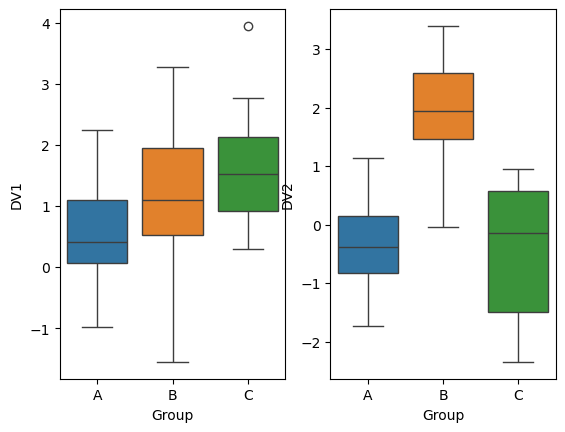

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data = df_dsa, x = 'Group', y = 'DV1', hue = df_dsa.Group.tolist(), ax = axs[0])
sns.boxplot(data = df_dsa, x = 'Group', y = 'DV2', hue = df_dsa.Group.tolist(), ax = axs[1])
plt.show()

### Definition of Hypotheses:

**Null Hypothesis (H0)**

H0: There are no significant differences among the three study groups (Group A, Group B, Group C) regarding the dependent variables of understanding of concepts (DV1) and practical skills (DV2).

The null hypothesis suggests that, regardless of the teaching method used (traditional, project-based, or interactive with technology), there is no statistically significant difference in students' academic performance, both in theoretical understanding and practical skills.

**Alternative Hypothesis (H1)**

H1: There are significant differences among at least two of the three study groups (Group A, Group B, Group C) regarding the dependent variables of understanding of concepts (DV1) and practical skills (DV2).

The alternative hypothesis proposes that teaching methods have different impacts on students' academic performance. This means that at least one teaching method is statistically more effective or less effective than the others in terms of improving understanding of concepts, practical skills, or both.

In [22]:
# MANOVA
# dependent variables ~ independent variables
maov = MANOVA.from_formula('DV1 + DV2 ~ Group', data = df_dsa)

In [23]:
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.8581 2.0000 56.0000  4.6317 0.0138
          Pillai's trace 0.1419 2.0000 56.0000  4.6317 0.0138
  Hotelling-Lawley trace 0.1654 2.0000 56.0000  4.6317 0.0138
     Roy's greatest root 0.1654 2.0000 56.0000  4.6317 0.0138
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         Group          Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.3574 4.0000 112.0000 18.8364 0.0000
         Pillai's trace 0.7316 4.0000 114.0000 16.4396 0.0000
 Hotelling-Lawley trace 1.

Let's interpret the results step by step:

**Intercept Section**

This section tests the null hypothesis that the multivariate mean intercept is equal to zero. Results are presented for four different statistics: Wilks' Lambda, Pillai's Trace, Hotelling-Lawley Trace, and Roy's Greatest Root.

Interpretation: With a p-value of 0.0138 (less than 0.05), we reject the null hypothesis, suggesting that the multivariate mean intercept is significantly different from zero.

The other three tests provide consistent results with the interpretation of Wilks' Lambda.

**Group Section**

This section tests the null hypothesis that group means are equal across all dependent variables. Again, results are presented for the same four statistics.

* Wilks' Lambda - Interpretation: With a p-value close to zero, we reject the null hypothesis, indicating significant differences in the multivariate means of the groups.
* Pillai's Trace - Interpretation: Results consistent with Wilks' Lambda, reinforcing rejection of the null hypothesis.
* Hotelling-Lawley Trace and Roy's Greatest Root:
    * High F-values, p-values close to zero.

Interpretation: Both confirm rejection of the null hypothesis.

**Conclusion**

All tests indicate there are statistically significant differences between the groups regarding the dependent variables considered in the model. The very low p-values across all tests reinforce this conclusion. This means that, based on the data and the specified model, the means of the dependent variables vary significantly among the studied groups.

### Linear Discriminant Analysis (LDA)

And which teaching method stands out compared to the others?

Here we will perform Linear Discriminant Analysis (LDA) using sklearn to observe the differences between each group. LDA will discriminate between the groups using information from both dependent variables.

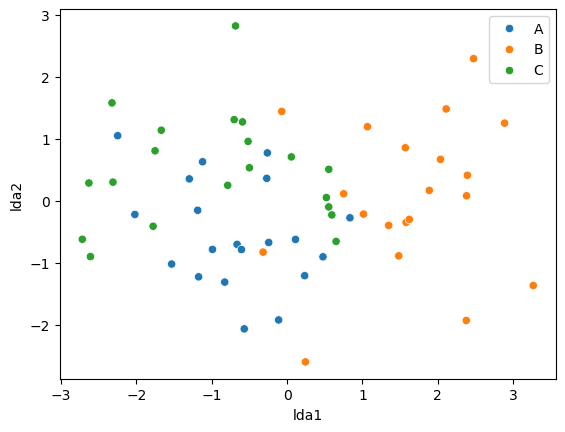

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

# Data
X = df_dsa[['DV1', 'DV2']]
y = df_dsa['Group']

# LDA Model
model = lda().fit(X = X, y = y)

# Probability of the groups
model.priors_

# Mean
model.means_

# Coeficients
model.scalings_

# Variance Explained
model.explained_variance_ratio_       

# Plot
X_new = pd.DataFrame(lda().fit(X=X, y = y).transform(X), columns = ['lda1', 'lda2'])
X_new['Group'] = df_dsa['Group']
sns.scatterplot(data = X_new, x = 'lda1', y = 'lda2', hue = df_dsa.Group.tolist())
plt.show()

The plot shows a clear separation of group B, while there is almost no distinction between groups A and C.

In [27]:
model.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [28]:
model.means_

array([[ 0.56933459, -0.35217102],
       [ 1.05575035,  1.92120921],
       [ 1.60491694, -0.5033696 ]])

In [29]:
model.scalings_

array([[-0.10054727,  0.98701603],
       [ 1.02323379,  0.04803305]])

# End